In [1]:
y = x + 2
3y = 4x - 1

 x -  y = -2
4x - 3y = 1   # x = 7, y = 9

[[1  -1], @  [[x],    =  [[-2], 
 [4  -3]]     [y]],        [1]]

SyntaxError: invalid decimal literal (4060722567.py, line 2)

In [3]:
import numpy as np

A = np.array([[1, -1], [4, -3]])
B = np.array([[-2], [1]])
print(A)
print(B)

[[ 1 -1]
 [ 4 -3]]
[[-2]
 [ 1]]


In [7]:
# 역행렬
A1 = np.linalg.inv(A)

In [9]:
# A @ x @ A1 = B @ A1 : 잘못된 방식
x = A1 @ B 
print(x)

[[7.]
 [9.]]


In [15]:
# y = x + 2
# 3y = 4x - 1
# y = x + 3

#  w1 -  w2 = -2
# 4w1 - 3w2 = 1 
#  w1 -  w2 = -3
    
X = np.array([[1, -1, 1], [4, -3, 1], [1, -1, 1]])
y = np.array([[-2], [1], [-3]])
print(X)
print(y)

[[ 1 -1  1]
 [ 4 -3  1]
 [ 1 -1  1]]
[[-2]
 [ 1]
 [-3]]


In [16]:
# 최소 자승법 : (AT@A)−1 @ AT @ B
np.linalg.inv(X.T @ X) @ X.T @ y

array([[-0.1875 ],
       [-1.75   ],
       [-4.40625]])

In [33]:
X = np.random.rand((10)) * 3
X

array([1.32135879, 0.93256312, 2.59305239, 1.76939433, 0.58497178,
       0.65423053, 2.60417637, 2.83096005, 0.14685918, 0.52258571])

In [34]:
y = X * 2 + np.random.randn((10))
y

array([2.37720589, 2.7160982 , 5.47052775, 3.78134366, 1.11853199,
       1.38682441, 4.98038926, 5.20900222, 0.04970612, 2.12783038])

In [35]:
X = X.reshape(-1, 1)
X = np.hstack([X, np.ones((X.shape[0], 1))])

In [36]:
weight = np.linalg.inv(X.T @ X) @ X.T @ y

In [37]:
x1 = 0
x2 = 3

In [118]:
weight

array([1.82741576, 0.37064576])

In [38]:
# weight[0] : X의 회귀계수, weight[1] : 절편

y1 = weight[0] * x1 + weight[1]
y2 = weight[0] * x2 + weight[1]

In [39]:
print(x1, y1)
print(x2, y2)

0 0.3706457623760395
3 5.852893046395731


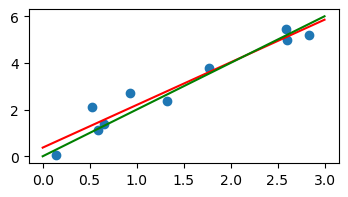

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,2))
plt.scatter(X[:, 0], y)
plt.plot([x1, x2], [y1, y2], 'r')
plt.plot([0, 3],[0, 6], 'g')

In [45]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
lr_reg.fit(X[:, [0]], y)

LinearRegression()

In [46]:
lr_reg.coef_, lr_reg.intercept_

(array([1.82741576]), 0.37064576237603974)

In [47]:
weight

array([1.82741576, 0.37064576])

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data , columns = diabetes.feature_names)
diabetes_df['target'] = diabetes.target


In [49]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


age       0.187889
sex       0.043062
bmi       0.586450
bp        0.441482
s1        0.212022
s2        0.174054
s3       -0.394789
s4        0.430453
s5        0.565883
s6        0.382483
target    1.000000
Name: target, dtype: float64

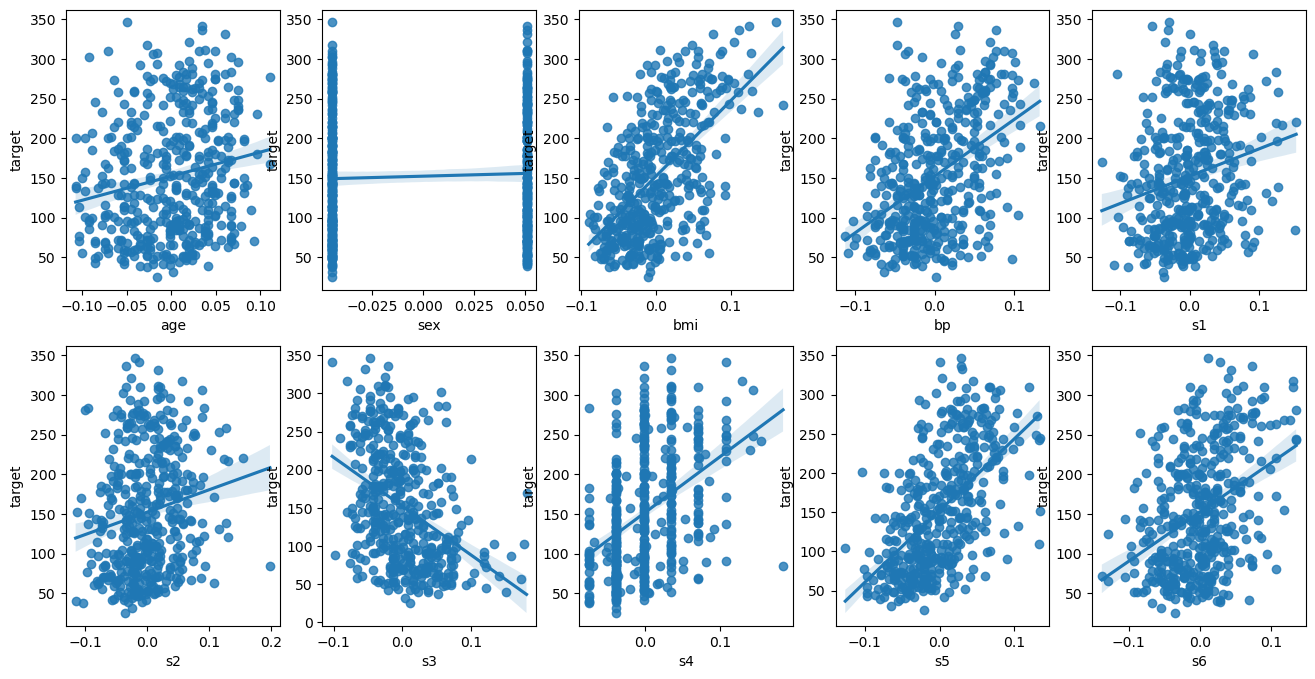

In [50]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=5 , nrows=2)
lm_features = ['age','sex','bmi','bp','s1','s2','s3','s4', 's5', 's6']

for i , feature in enumerate(lm_features):
    row = int(i/5)
    col = i%5
    sns.regplot(x=feature , y='target',data=diabetes_df, ax=axs[row][col])
diabetes_df.corr()['target']

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score                                              

y = diabetes_df.iloc[:, -1]
X = diabetes_df.iloc[:, :-1]
X_train , X_test , y_train , y_test = train_test_split(X, y,
                                                test_size=0.3, random_state=156)


In [52]:
lr = LinearRegression()
lr.fit(X_train ,y_train )
pred = lr.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f} , RMSE : {rmse:.3F}')
print(f'Variance score : {r2_score(y_test, pred):.3f}')

MSE : 2993.705 , RMSE : 54.715
Variance score : 0.497


In [ ]:
50.715
45.715

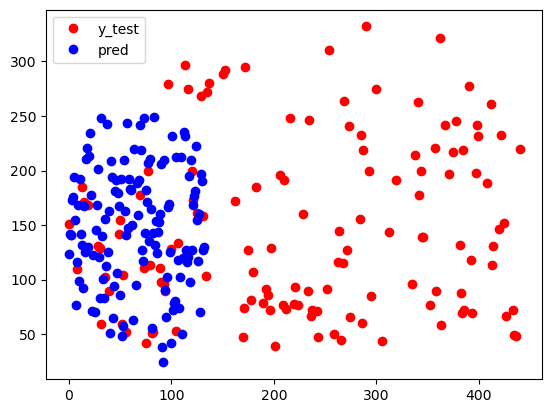

In [58]:
plt.plot(y_test, 'ro', label = 'y_test' )
plt.plot(pred, 'bo', label = 'pred')
plt.legend()

In [63]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
neg_mse_scores = cross_val_score(lr, X, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('5 folds 의 개별 Negative MSE scores:', np.round(-1 * neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores :', np.round(rmse_scores, 2))
print(f'5 folds 의 평균 RMSE : {avg_rmse:.3f}')


5 folds 의 개별 Negative MSE scores: [2779.92 3028.84 3237.69 3008.75 2910.21]
5 folds 의 개별 RMSE scores : [52.72 55.03 56.9  54.85 53.95]
5 folds 의 평균 RMSE : 54.692


In [68]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(0,4).reshape(2,2)
print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [69]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [70]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [72]:
poly_ftr @ model.coef_

array([  3.24324324, 123.24324324])

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
def true_fun(X):
    return np.cos(1.5 * np.pi * X)
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀계수는 
[-1.6]
입니다.
MSE는 0.40734978767325075입니다.

Degree 4 회귀계수는 
[-3.79 -1.33  1.25  2.71]
입니다.
MSE는 0.017772582198748284입니다.

Degree 15 회귀계수는 
[-3.43 -1.29  0.39  1.09  1.2   1.01  0.71  0.41  0.15 -0.05 -0.2  -0.29
 -0.34 -0.35 -0.33]
입니다.
MSE는 0.02164158331660091입니다.


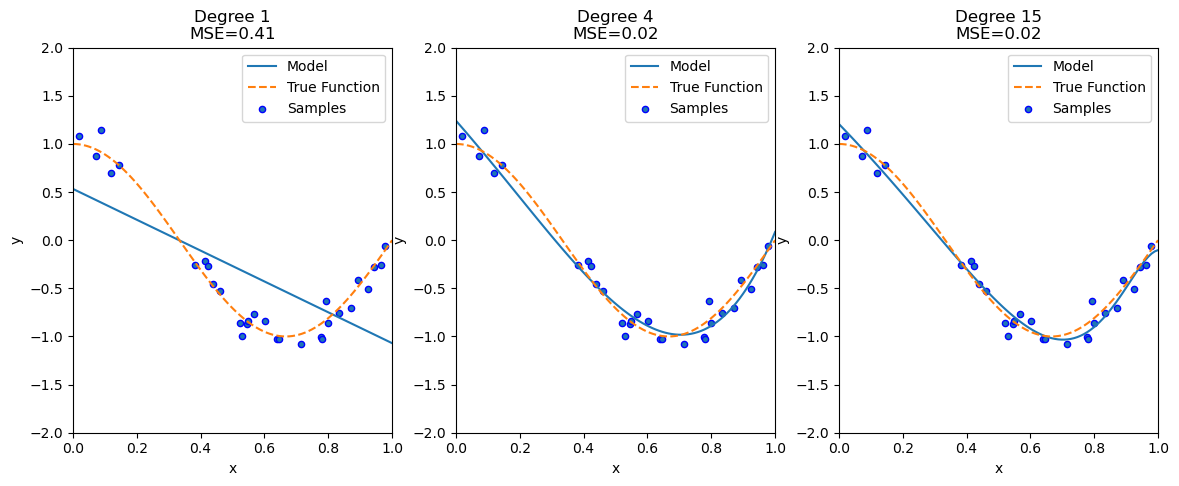

In [117]:
from sklearn.linear_model import Ridge
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    lr_reg = Ridge(alpha=0.01)
    X_poly = polynomial_features.fit_transform(X.reshape(-1,1), y)
    lr_reg.fit(X_poly, y)
    scores = cross_val_score(lr_reg, X_poly, y, scoring='neg_mean_squared_error', cv=10)
    coeff = lr_reg.coef_
    # 이전 코드에 이어서 작성
    print(f'\nDegree {degrees[i]} 회귀계수는 \n{np.round(coeff, 2)}\n입니다.')
    print(f'MSE는 {-1 * np.mean(scores)}입니다.')
    X_test = np.linspace(0, 1, 100).reshape(-1, 1)
    X_test_poly = polynomial_features.transform(X_test)
    pred = lr_reg.predict(X_test_poly)
    plt.plot(X_test, pred, label = 'Model')
    plt.plot(X_test, true_fun(X_test), '--', label='True Function')
    plt.scatter(X, y, edgecolors='b', s = 20, label = 'Samples')
    plt.xlabel('x');plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2, 2)); plt.legend()
    plt.title(f'Degree {degrees[i]}\nMSE={-scores.mean():.2f}')
plt.show()


In [100]:
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data , columns = diabetes.feature_names)
diabetes_df['target'] = diabetes.target
y = diabetes_df.iloc[:, -1]
X = diabetes_df.iloc[:, :-1]
X_train , X_test , y_train , y_test = train_test_split(X, y,
test_size=0.3, random_state=156)

In [93]:
poly = PolynomialFeatures(degree = 2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_poly ,y_train )
pred = lr.predict(X_test_poly)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f} , RMSE : {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, pred):.3f}')

MSE : 3000.234 , RMSE : 54.774
Variance score : 0.496


In [101]:
from sklearn.linear_model import Lasso
alphas = [0, 0.01, 0.1, 1, 10]
for alpha in alphas :
    lasso = Lasso(alpha = alpha)
    neg_mse_scores = cross_val_score(lasso, X, y,
    scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha {alpha} 일 때 5 folds 의 평균 RMSE : {avg_rmse:.3f} ')

alpha 0 일 때 5 folds 의 평균 RMSE : 54.692 
alpha 0.01 일 때 5 folds 의 평균 RMSE : 54.756 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 54.843 
alpha 1 일 때 5 folds 의 평균 RMSE : 62.009 
alpha 10 일 때 5 folds 의 평균 RMSE : 77.264 


C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.122e+05, tolerance: 2.153e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV

C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.320e+05, tolerance: 2.621e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV

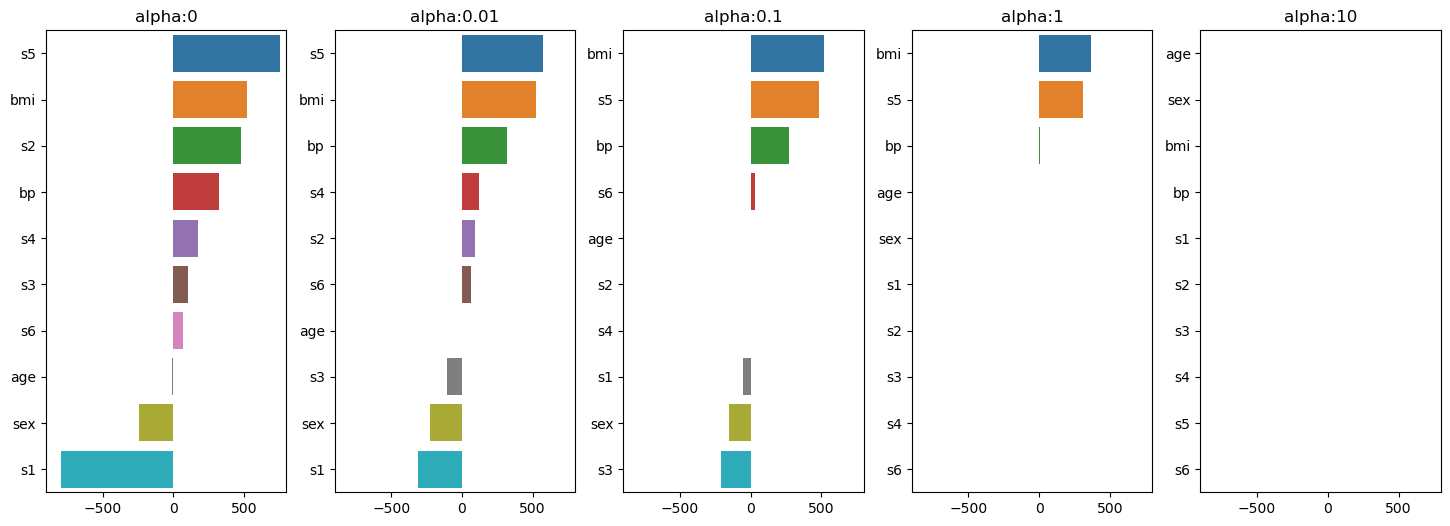

In [102]:
fig, axs = plt.subplots(figsize = (18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()
for pos, alpha in enumerate(alphas):
    lasso = Lasso(alpha = alpha)
    lasso.fit(X, y)
    coeff = pd.Series(data = lasso.coef_, index = X.columns)
    colname='alpha:'+ str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname); axs[pos].set_xlim(-900, 800)
    sns.barplot(x = coeff.values, y=coeff.index, ax=axs[pos])
plt.show()


In [103]:
lasso_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+ str(lasso_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)


,alpha:0,alpha:0.01,alpha:0.1,alpha:1,alpha:10
s5,751.273690,571.330356,483.912648,307.605418,0.0
bmi,519.845920,525.566130,517.186795,367.703860,0.0
s2,476.739000,89.324647,-0.000000,0.000000,0.0
bp,324.384645,316.168834,275.077235,6.298858,0.0
s4,177.063234,119.597616,0.000000,0.000000,0.0
s3,101.043256,-105.078369,-210.157991,-0.000000,-0.0
s6,67.626692,65.008383,33.673965,0.000000,0.0
age,-10.009866,-1.304662,-0.000000,0.000000,0.0
sex,-239.815644,-228.819129,-155.359976,-0.000000,0.0
s1,-792.175612,-307.016211,-52.539365,0.000000,0.0


In [104]:
from sklearn.linear_model import ElasticNet

ElasticNet()

ElasticNet()

In [106]:
import warnings
warnings.filterwarnings('ignore')

In [108]:
from sklearn.linear_model import SGDRegressor
alphas = [0, 0.01, 0.1, 1, 10]
for alpha in alphas :
    sgd_reg = SGDRegressor(alpha=alpha)
    neg_mse_scores = cross_val_score(sgd_reg, X, y,
    scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha {alpha} 일 때 5 folds 의 평균 RMSE : {avg_rmse:.3f} ')

alpha 0 일 때 5 folds 의 평균 RMSE : 59.018 
alpha 0.01 일 때 5 folds 의 평균 RMSE : 65.434 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 74.978 
alpha 1 일 때 5 folds 의 평균 RMSE : 77.016 
alpha 10 일 때 5 folds 의 평균 RMSE : 77.245 


In [109]:
sgd = SGDRegressor(verbose=True)
sgd.fit(X_train, y_train)

-- Epoch 1
Norm: 4.55, NNZs: 10, Bias: 96.187178, T: 309, Avg. loss: 7451.350222
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 7.63, NNZs: 10, Bias: 123.683168, T: 618, Avg. loss: 3854.157689
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 10.20, NNZs: 10, Bias: 137.805058, T: 927, Avg. loss: 3180.449092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 12.56, NNZs: 10, Bias: 144.856745, T: 1236, Avg. loss: 2987.796651
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 14.75, NNZs: 10, Bias: 148.288640, T: 1545, Avg. loss: 2925.316757
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 16.83, NNZs: 10, Bias: 150.330568, T: 1854, Avg. loss: 2900.162345
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 18.81, NNZs: 10, Bias: 151.992102, T: 2163, Avg. loss: 2883.843989
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 20.71, NNZs: 10, Bias: 152.841581, T: 2472, Avg. loss: 2873.082289
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 22.54, NNZs: 10, Bias: 153.452108, T:

SGDRegressor(verbose=True)

In [112]:
pred = sgd.predict(X_test)
mean_squared_error(y_test, pred)

3505.53317866514

In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data , columns = diabetes.feature_names)
diabetes_df['target'] = diabetes.target
y = diabetes_df.iloc[:, -1]
X = diabetes_df.iloc[:, :-1]

rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
mse_scores = cross_val_score(rf_reg, X, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(f' 5 교차 검증의 평균 RMSE : {avg_rmse:.3f} ')

 5 교차 검증의 개별 Negative MSE scores:  [-2994.11 -3112.26 -3547.44 -3272.69 -3709.92]
 5 교차 검증의 개별 RMSE scores :  [54.72 55.79 59.56 57.21 60.91]
 5 교차 검증의 평균 RMSE : 57.637 


In [123]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(max_depth=4)
dt_reg.fit(X, y)

DecisionTreeRegressor(max_depth=4)

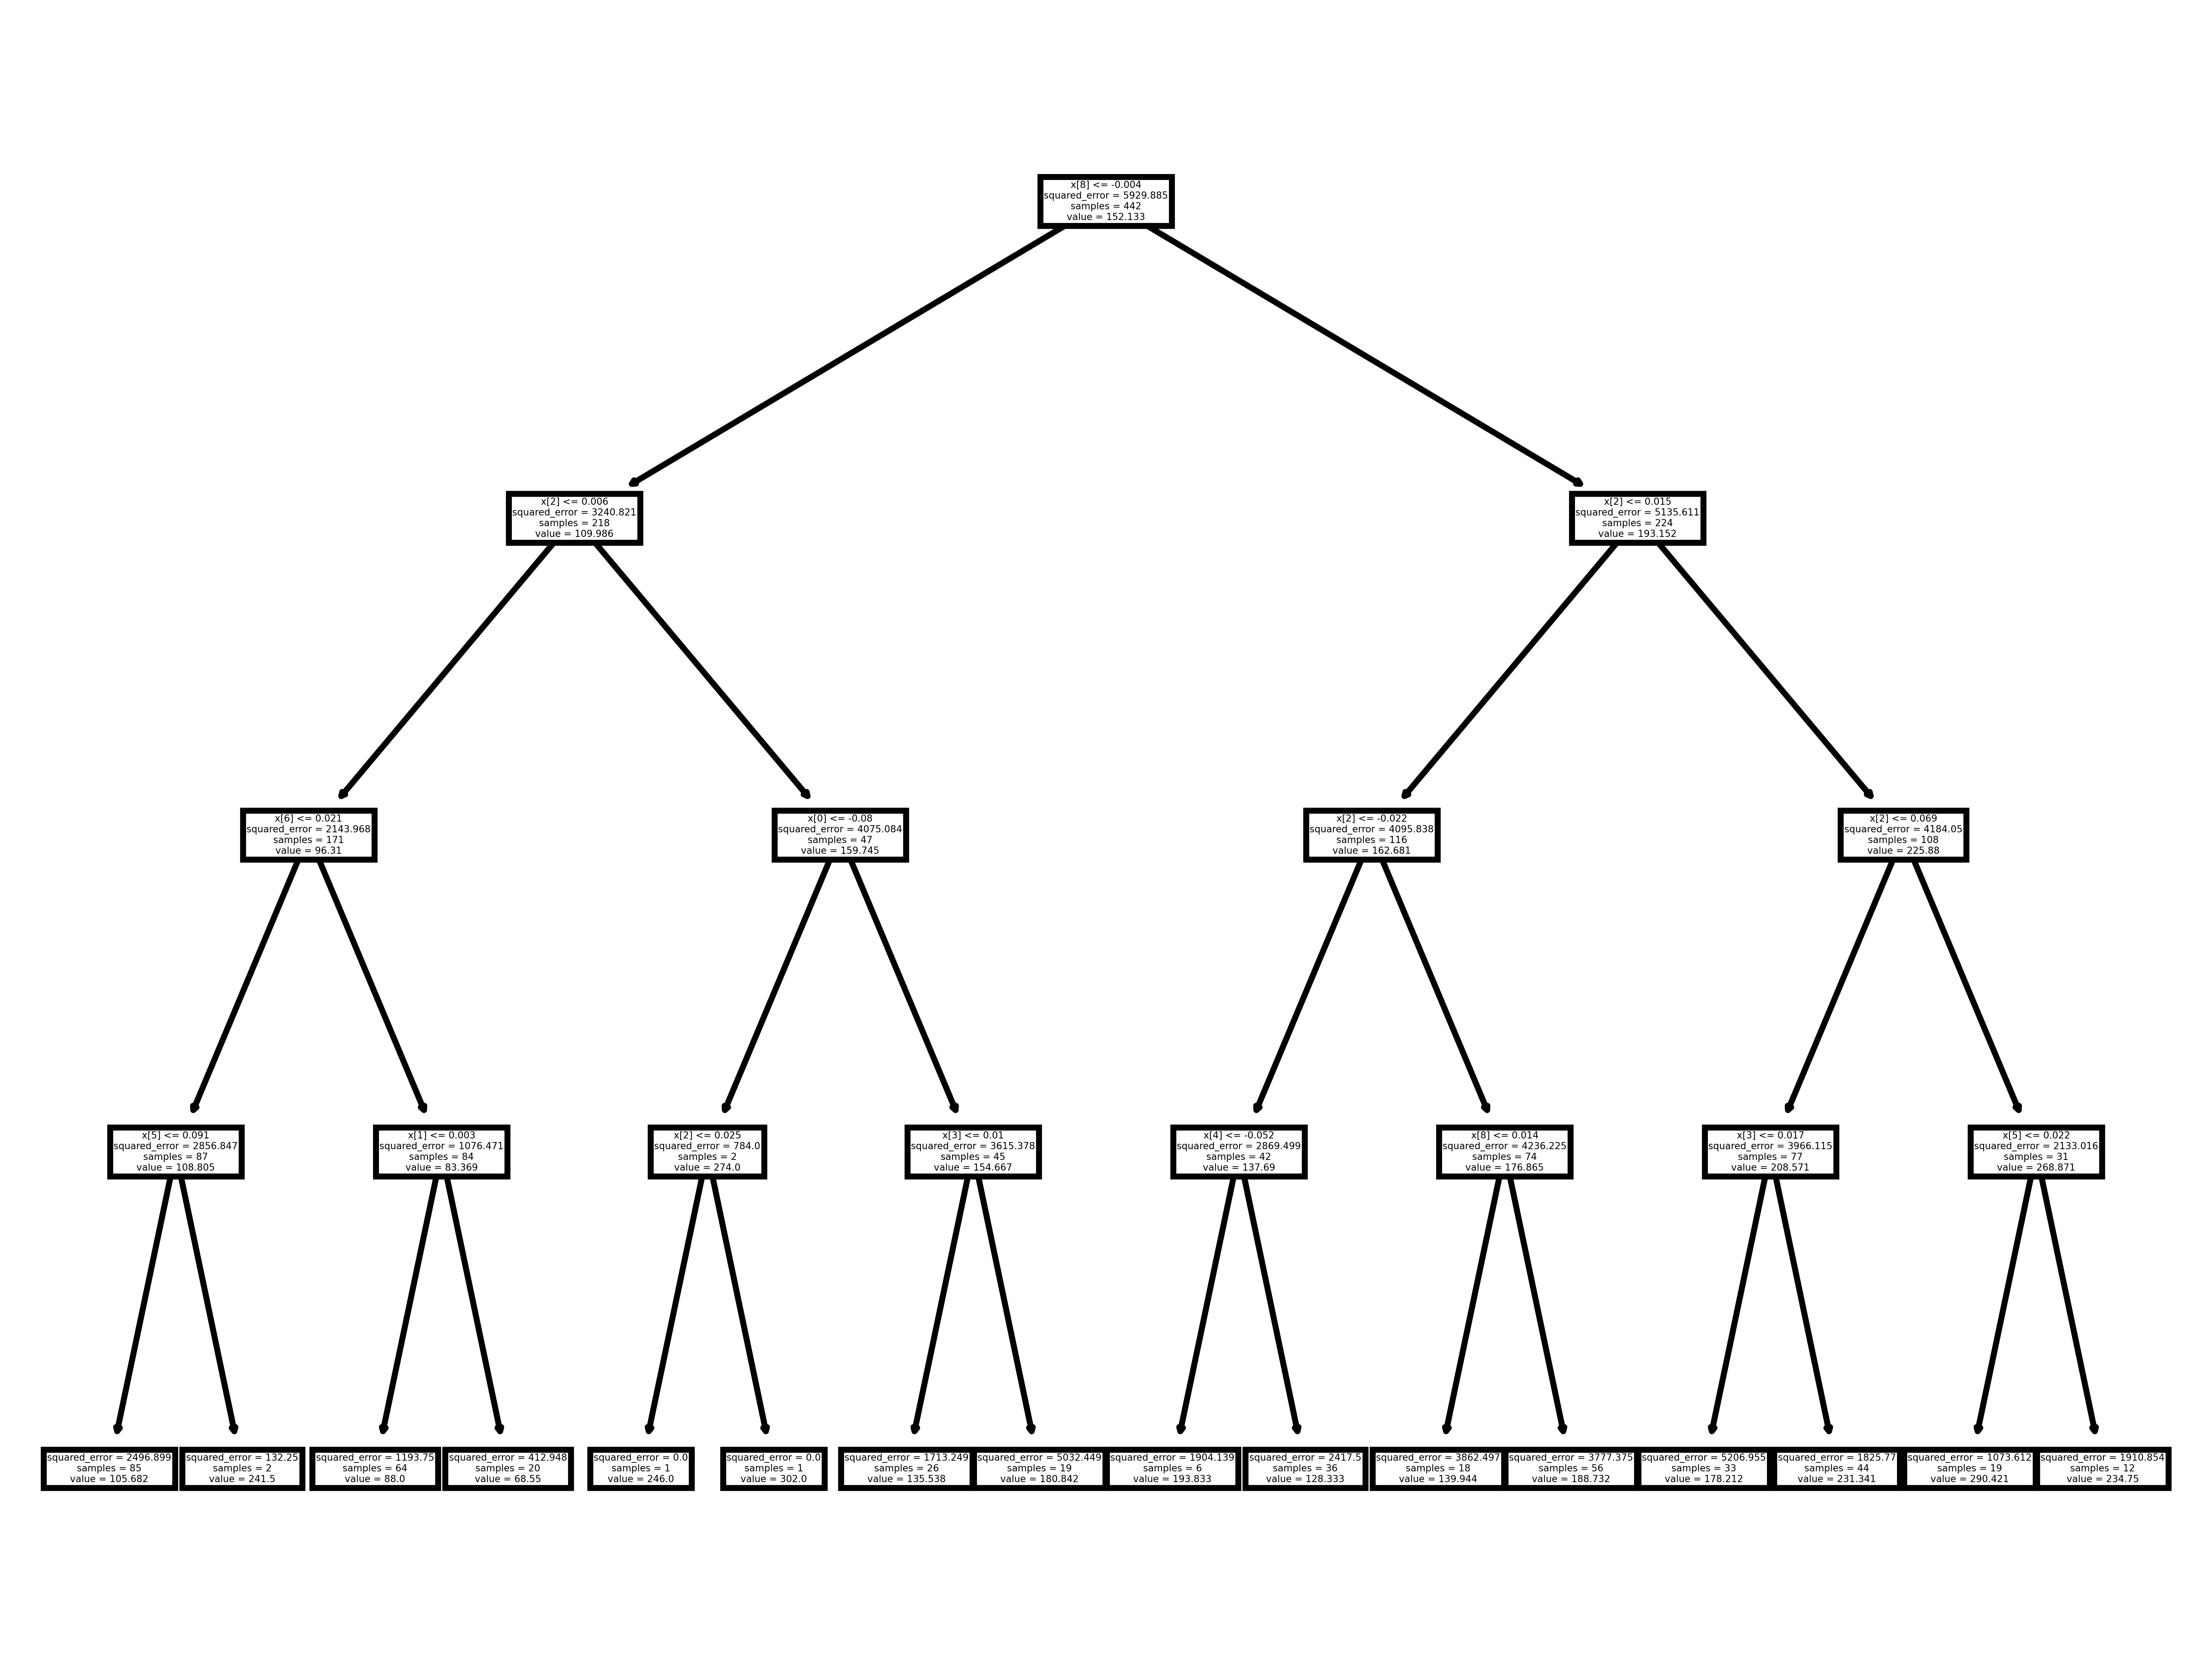

In [126]:
from sklearn.tree import plot_tree
plt.figure(dpi = 1200)
plot_tree(dt_reg)
plt.savefig('a.png')

(100, 2)


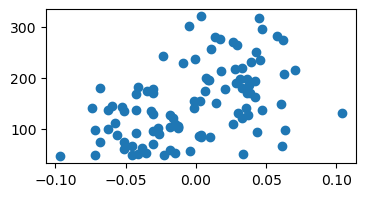

In [128]:
import matplotlib.pyplot as plt

sample_df = diabetes_df[['s5','target']]
sample_df = sample_df.sample(n=100,random_state=0)
print(sample_df.shape)
plt.figure(figsize=(4,2))
plt.scatter(sample_df['s5'] , sample_df['target'])

In [129]:
import numpy as np
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()
dt_reg = DecisionTreeRegressor()
X_test = np.linspace(-0.1, 0.1, 50).reshape(-1,1)
X_feature = sample_df['s5'].values.reshape(-1,1)
y_target = sample_df['target'].values.reshape(-1,1)
lr_reg.fit(X_feature, y_target)
dt_reg.fit(X_feature, y_target)


DecisionTreeRegressor()

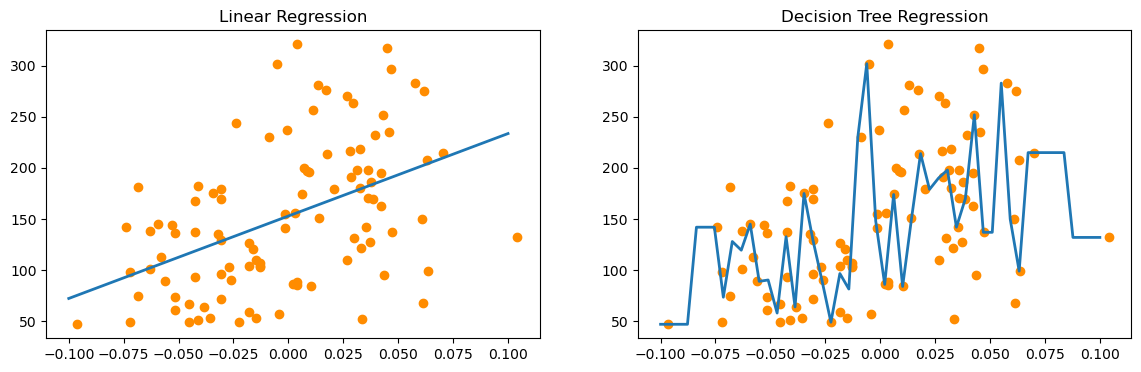

In [130]:
pred_lr = lr_reg.predict(X_test)
pred_dt = dt_reg.predict(X_test)
fig , (ax1, ax2) = plt.subplots(figsize=(14,4), ncols=2)
ax1.set_title('Linear Regression')
ax1.scatter(sample_df['s5'], sample_df['target'], c="darkorange")
ax1.plot(X_test, pred_lr, linewidth=2 )
ax2.set_title('Decision Tree Regression')
ax2.scatter(sample_df['s5'], sample_df['target'], c="darkorange")
ax2.plot(X_test, pred_dt, linewidth=2 )

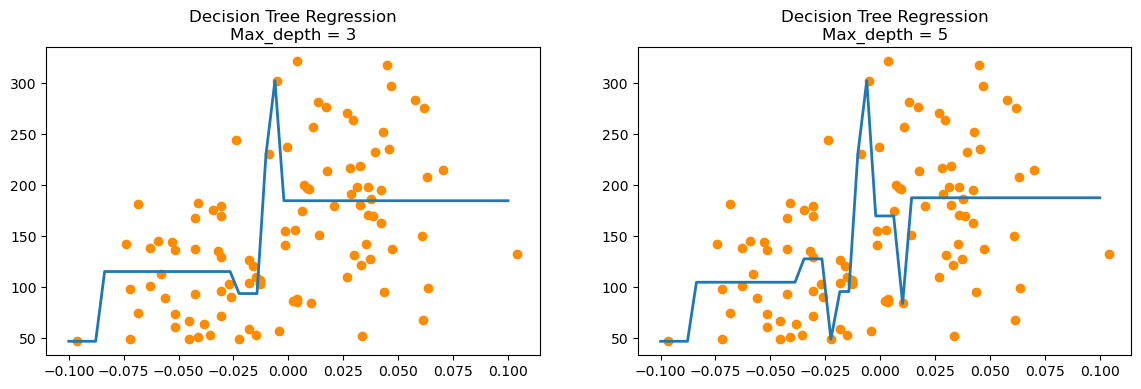

In [131]:
dt_reg1 = DecisionTreeRegressor(max_depth=3)
dt_reg1.fit(X_feature, y_target)
pred_dt1 = dt_reg1.predict(X_test)
dt_reg2 = DecisionTreeRegressor(max_depth=5)
dt_reg2.fit(X_feature, y_target)
pred_dt2 = dt_reg2.predict(X_test)
fig , (ax1, ax2) = plt.subplots(figsize=(14,4), ncols=2)
ax1.set_title('Decision Tree Regression\nMax_depth = 3')
ax1.scatter(sample_df['s5'], sample_df['target'], c="darkorange")
ax1.plot(X_test, pred_dt1, linewidth=2 )
ax2.set_title('Decision Tree Regression\nMax_depth = 5')
ax2.scatter(sample_df['s5'], sample_df['target'], c="darkorange")
ax2.plot(X_test, pred_dt2, linewidth=2 )


In [133]:
pred_dt = dt_reg.predict(X_feature)
pred_dt1 = dt_reg1.predict(X_feature)
pred_dt2 = dt_reg2.predict(X_feature)

In [134]:
print(mean_squared_error(y_target, pred_dt))
print(mean_squared_error(y_target, pred_dt1))
print(mean_squared_error(y_target, pred_dt2))

860.4313333333333
3191.413681532304
2689.2984286803967
